In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Problem Understanding -> Data collection -> Data Loading ->  Data exploration and various visualizations -> Data preprocessing (handling missing values, standardizing, feature engineering) -> Models implementation and finetuning -> Best model selection / combination of the best models -> Test evaluation when confident in model.

It is a univariate regression task with quite a lot of features.<br>
Data is presented in tabular format, so what models are worth consideration?<br>
- Linear Regression with regularizers
- SVR
- RandomForestRegressor
- Gradient Boosting
- Ensemble (combination of best performing models)

As for metric we'll use RMSE. We'll also perform CV metric

**Data Loading**

In [532]:
pd.set_option("display.max_columns", 500)

In [533]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Data Exploration**

In [534]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [535]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [536]:
train_df.describe(include="object").T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


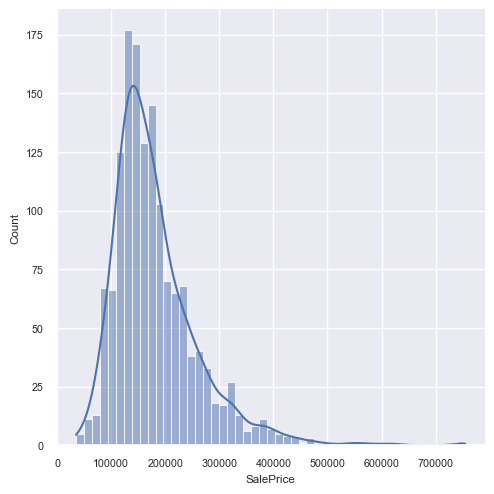

In [537]:
sns.displot(train_df["SalePrice"], kde=True);

In [538]:
print(stats.skew(train_df["SalePrice"]))

1.880940746034036


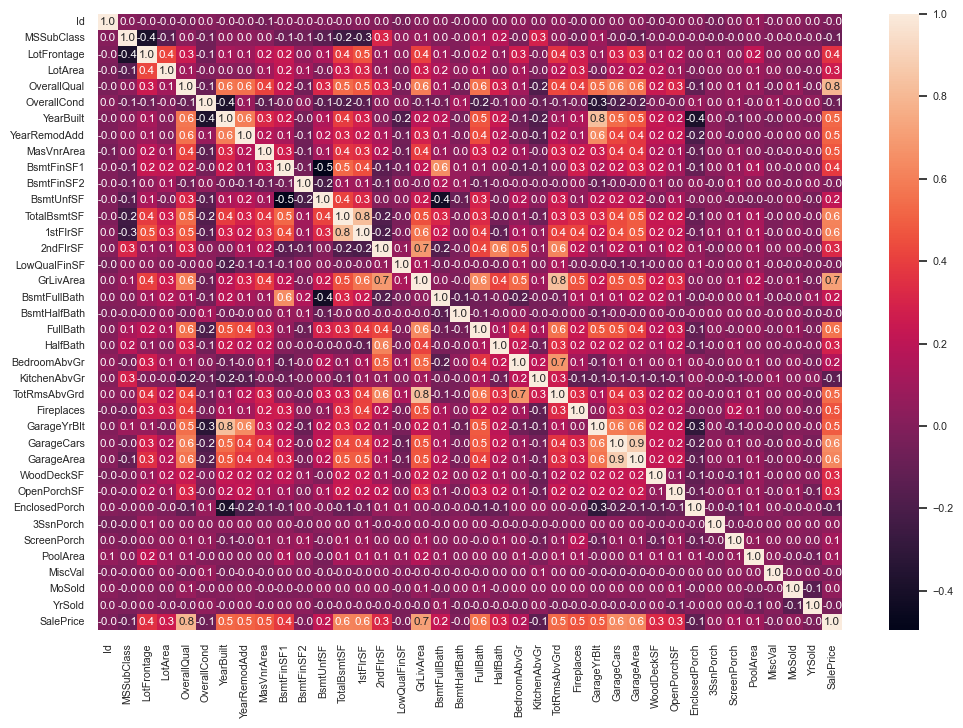

In [539]:
num_features = list(train_df.select_dtypes("number"))

plt.figure(figsize=(12, 8))
corr_mat = train_df[num_features].corr()
sns.set(font_scale=0.7)
sns.heatmap(corr_mat, annot=True, fmt=".1f");

Numerical Features with high correlation: OverallQual, GrLivArea, FullBath, GarageCars, GarageArea 

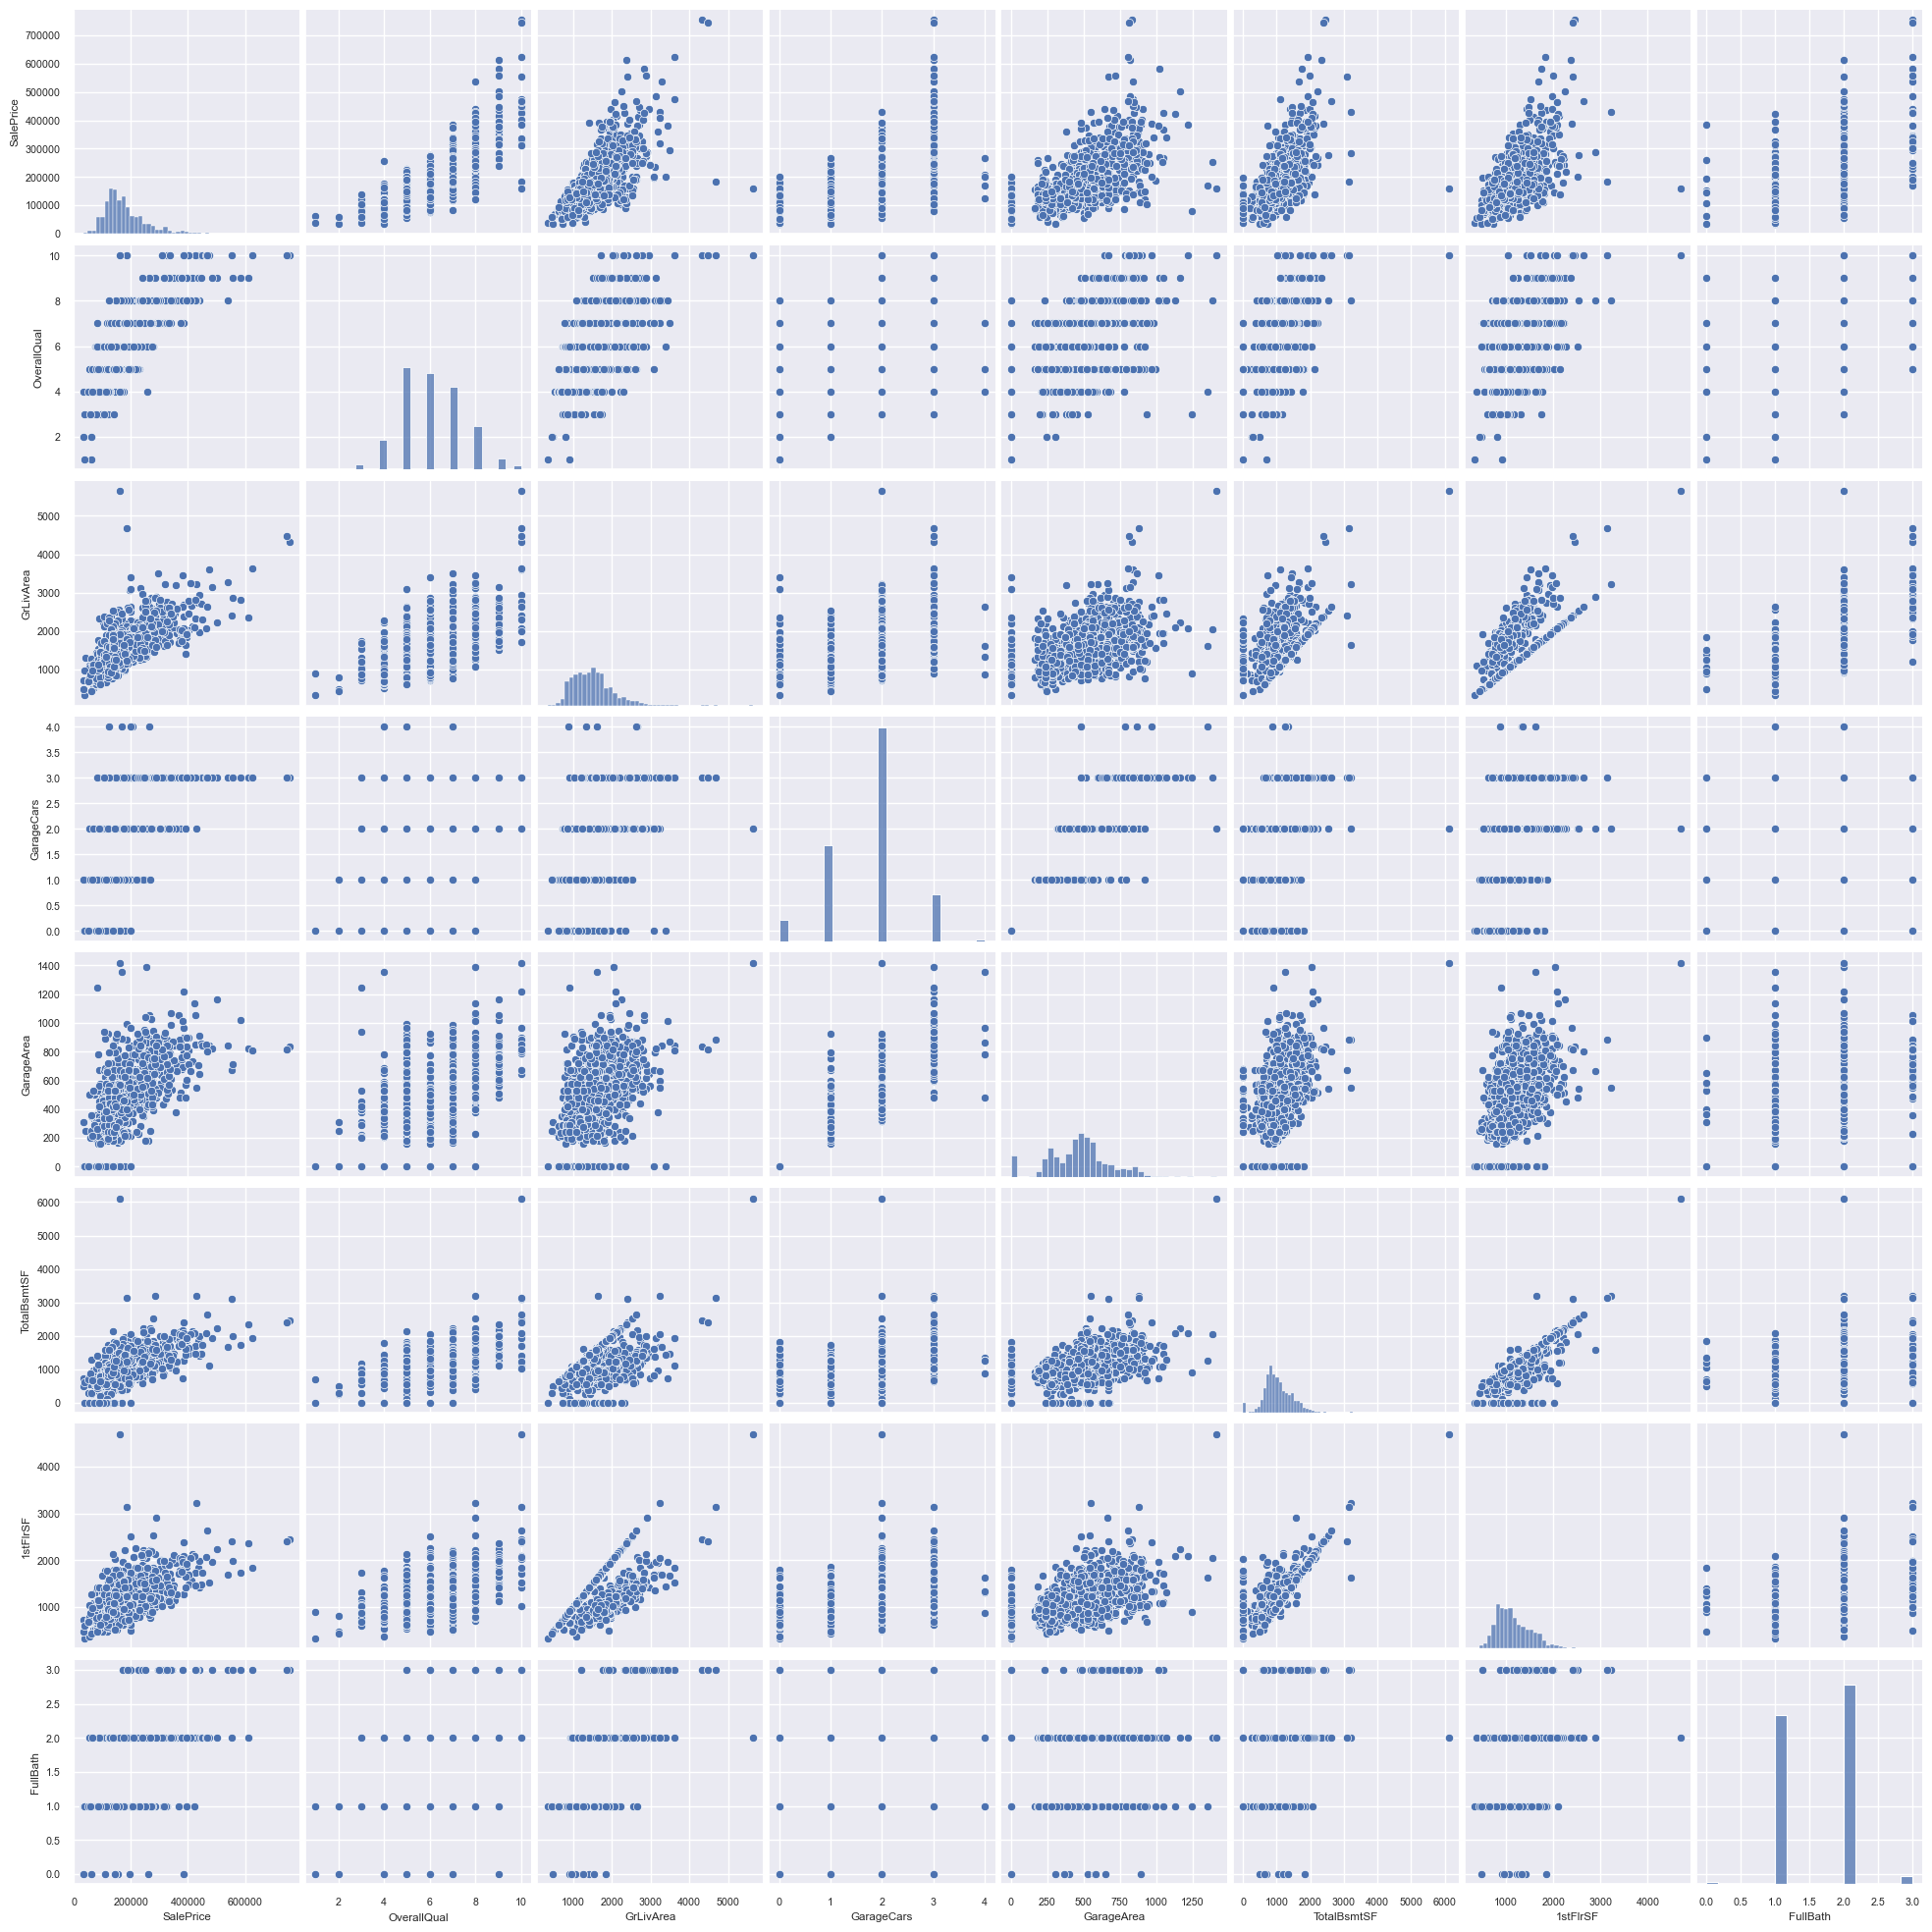

In [540]:
num_corr_features = corr_mat["SalePrice"].sort_values(ascending=False)[:8].index
sns.pairplot(train_df[num_corr_features]);

Yeah... These features are indeed promising, even though some of them cross-correlate

In [541]:
categorical_features = list(train_df.select_dtypes("object")) + ["OverallQual"]

In [542]:
def plot_cat_dependency(var):
    sns.boxplot(x=var, y="SalePrice", data=train_df)
    if train_df[var].nunique() >= 7: plt.xticks(rotation=90)

In [543]:
len(categorical_features)

44

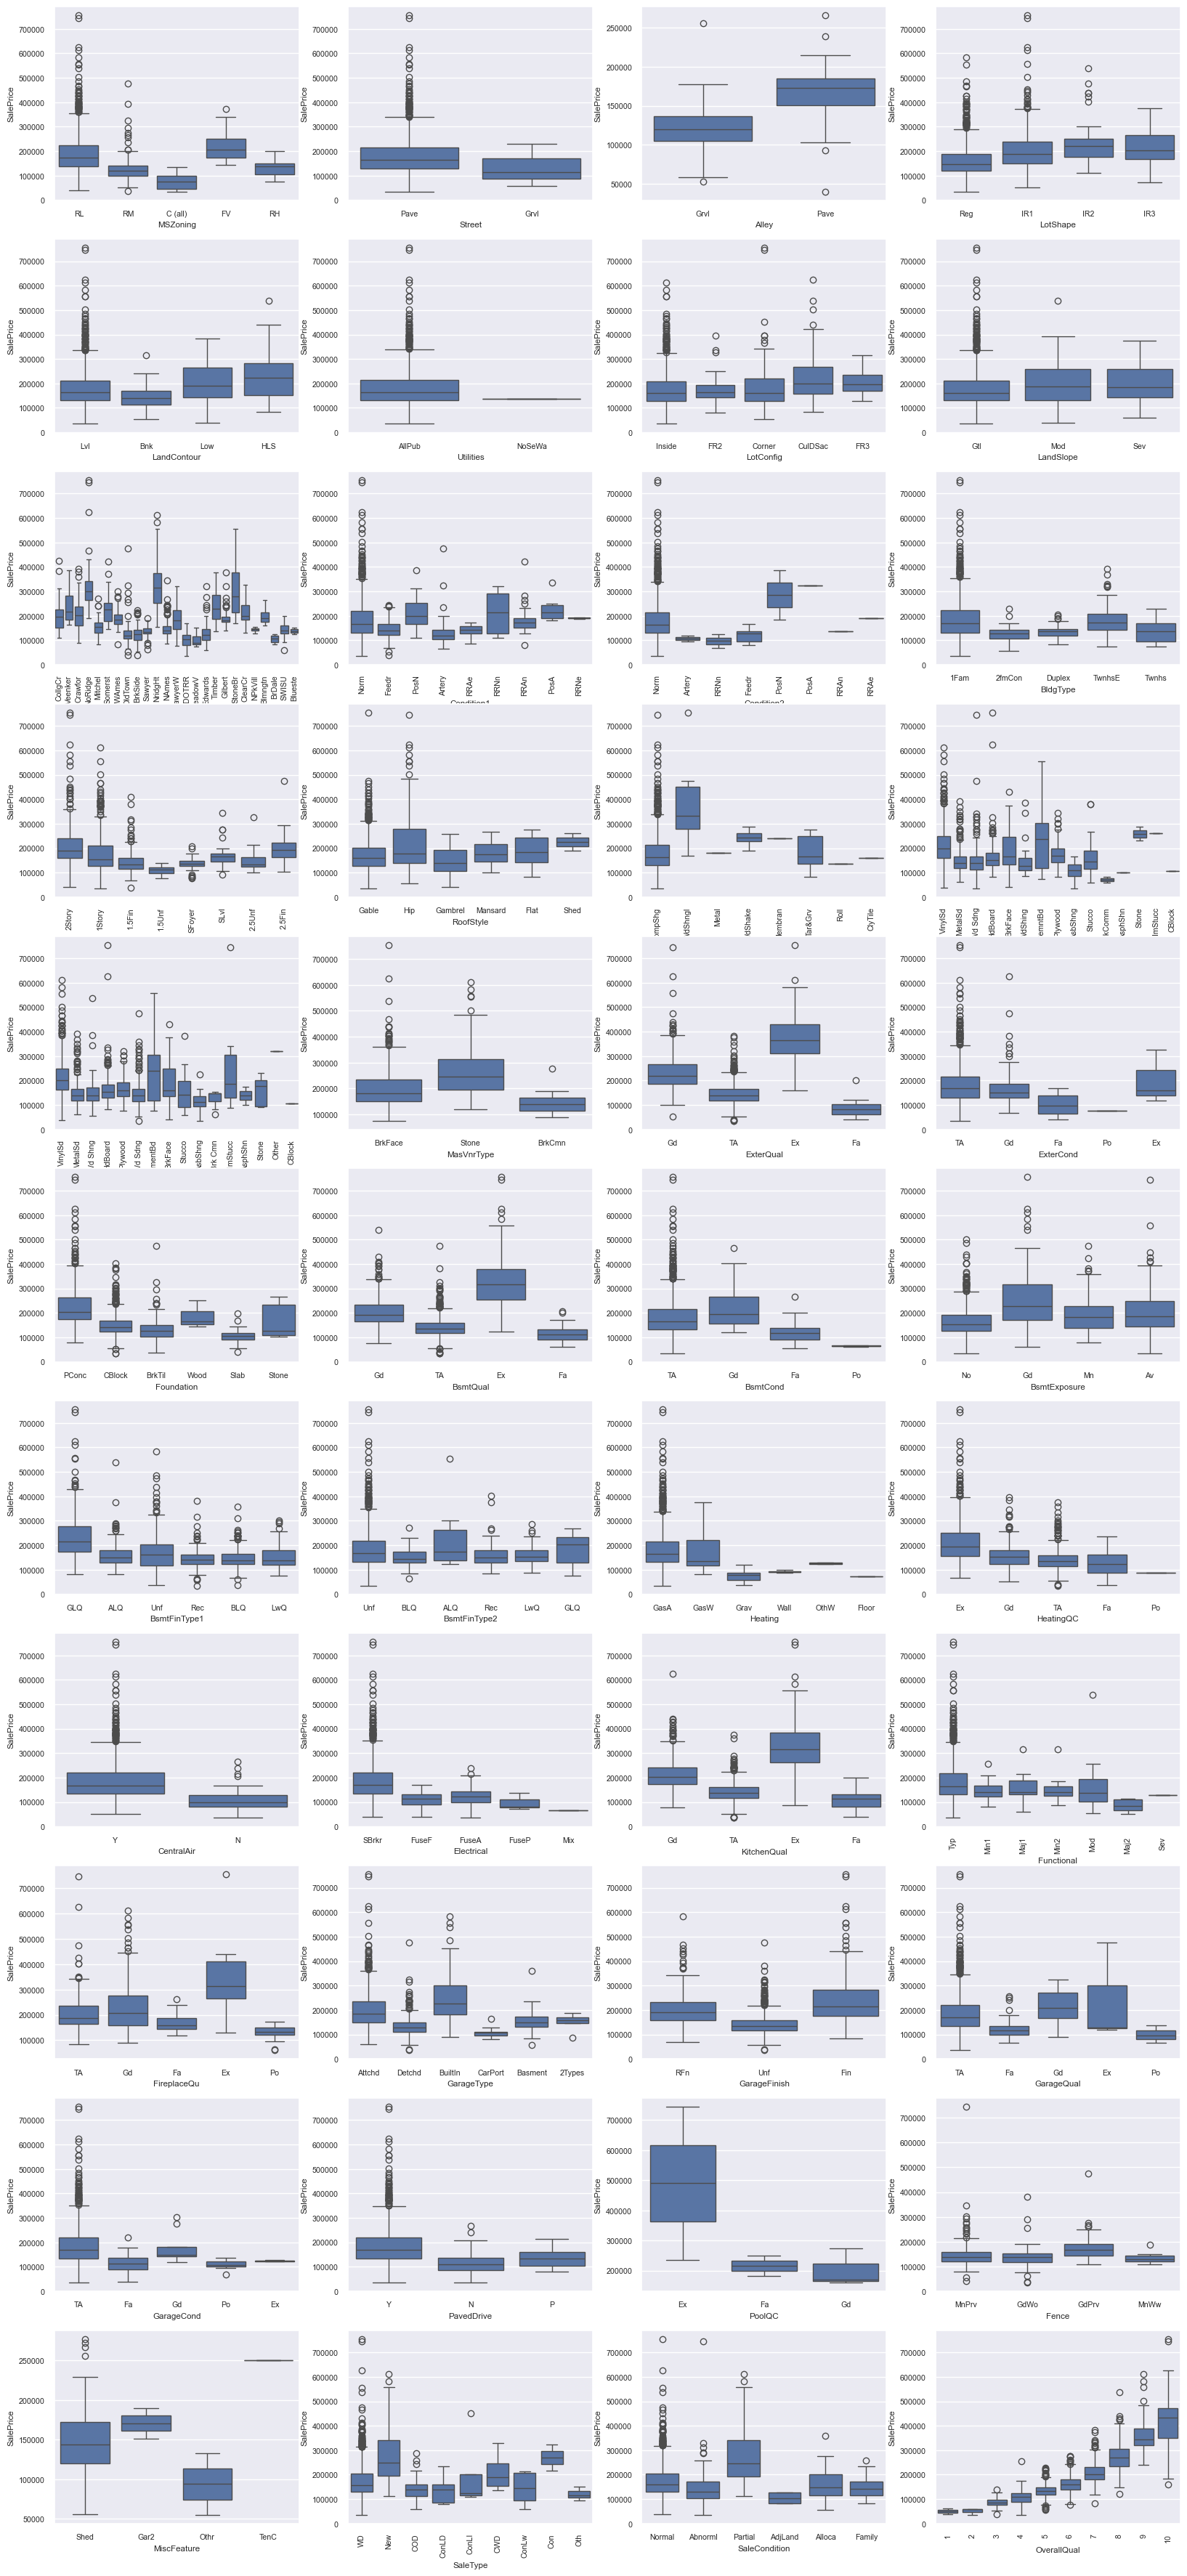

In [544]:
plt.figure(figsize=(20, 45))
for i, feature in enumerate(categorical_features):
    plt.subplot(11, 4, i+1)
    plot_cat_dependency(feature)

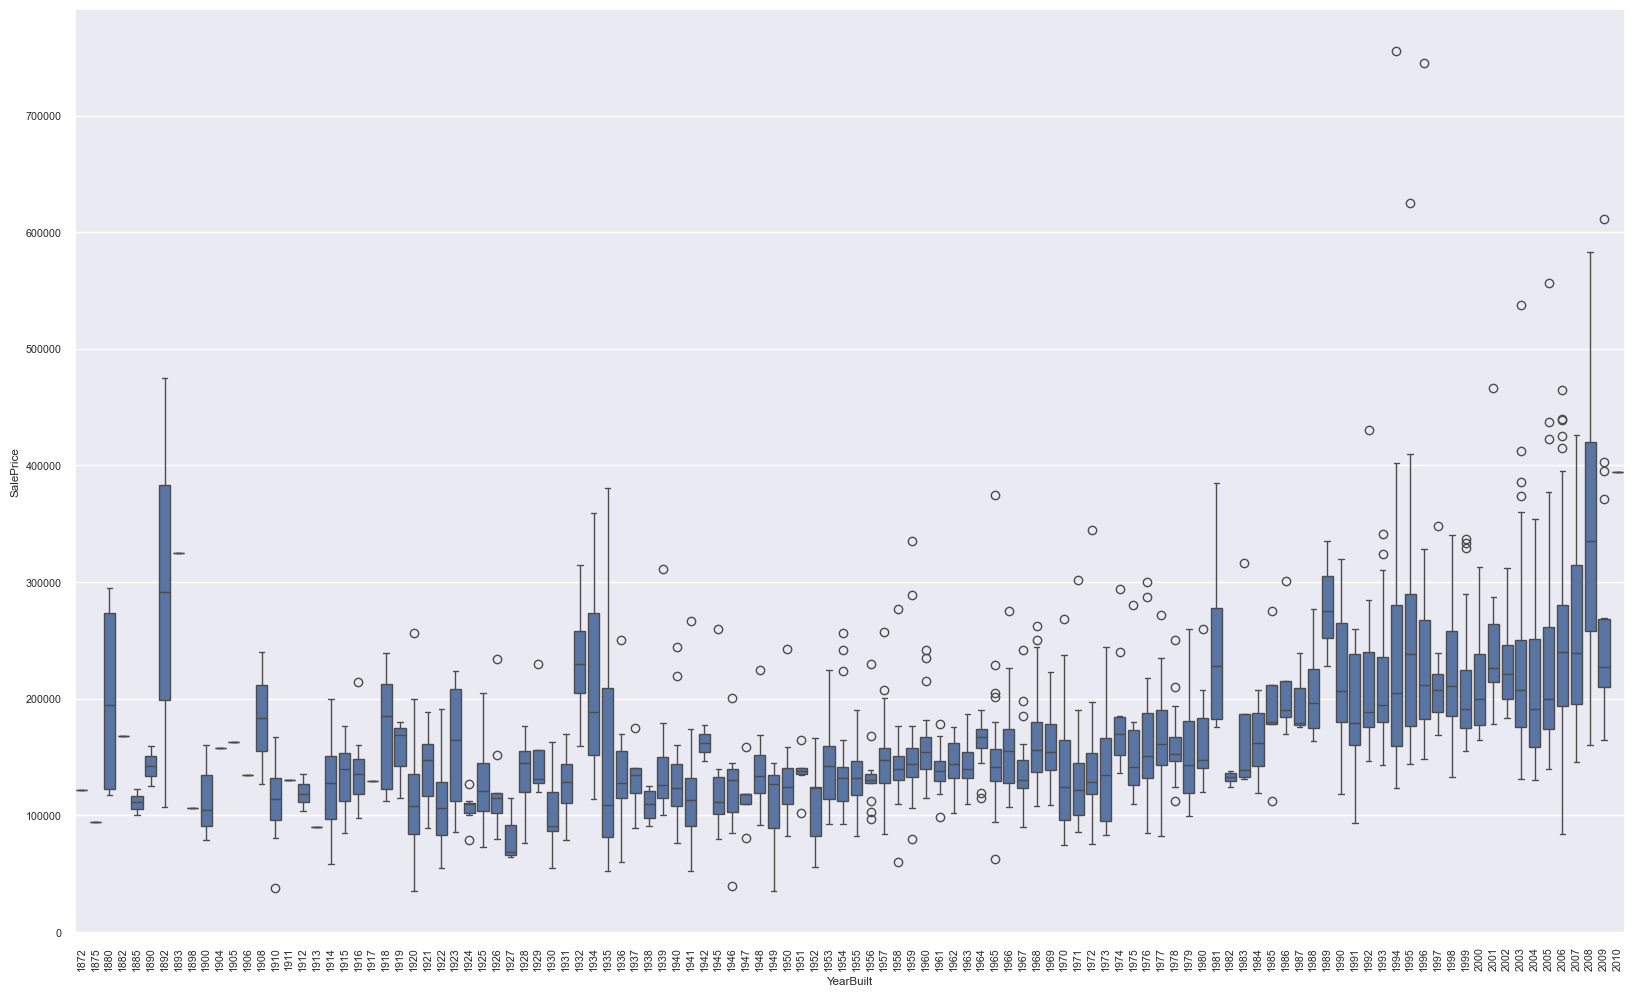

In [545]:
plt.figure(figsize=(20, 12))
plot_cat_dependency("YearBuilt")

In [546]:
train_df["OverallQual"].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

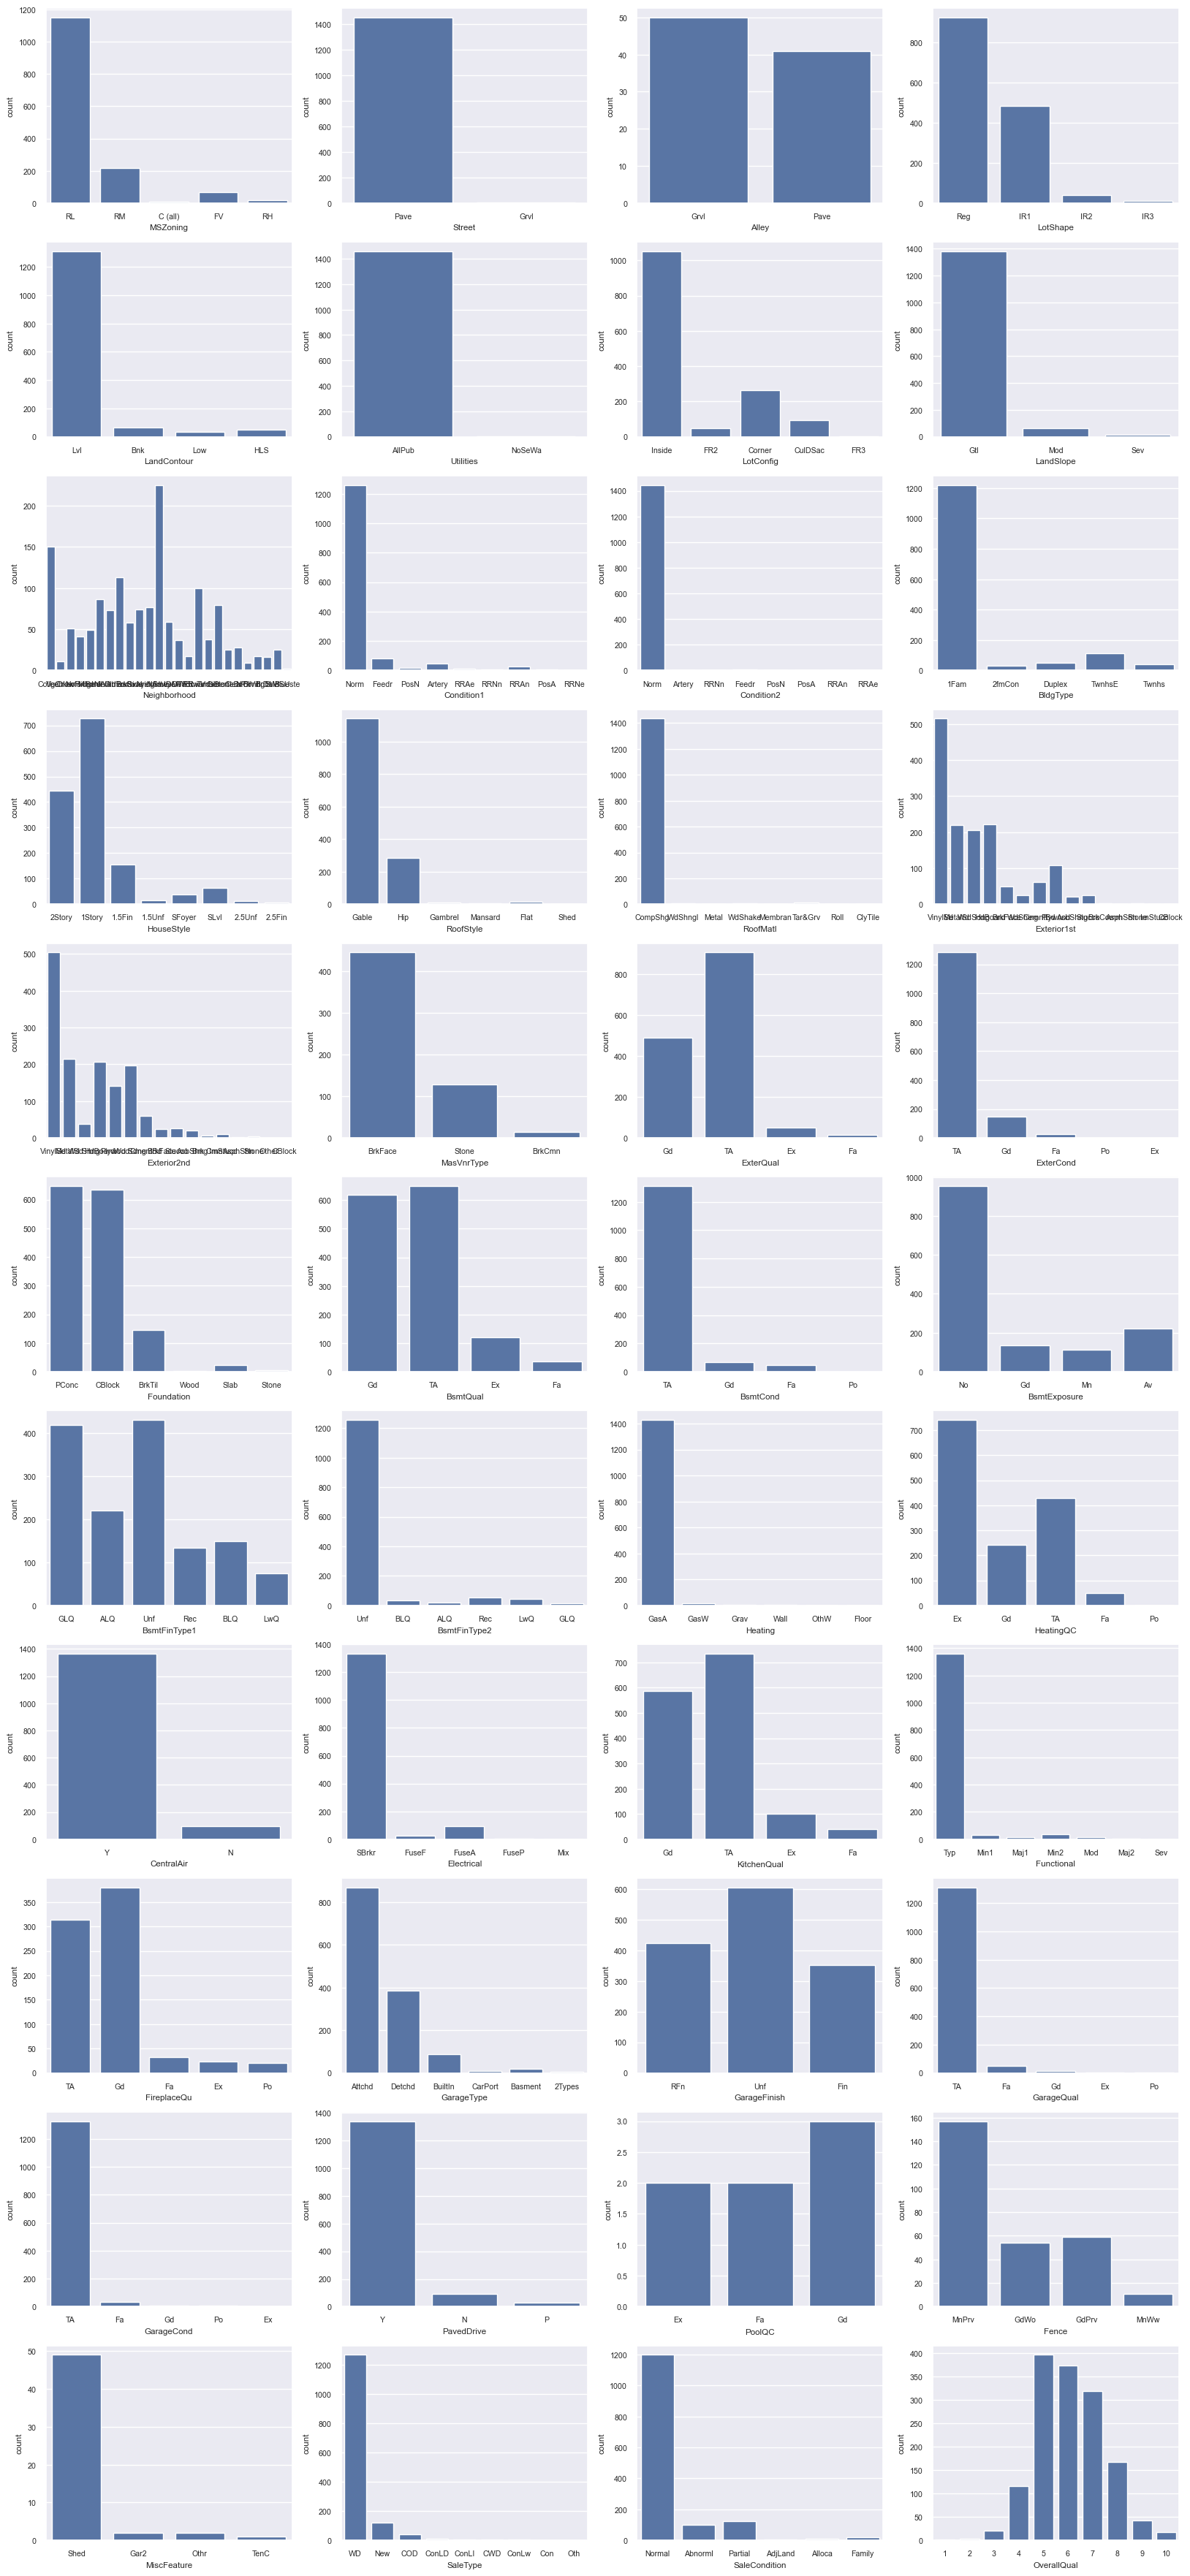

In [547]:
plt.figure(figsize=(20, 45))
for i, feature in enumerate(categorical_features):
    plt.subplot(11, 4, i+1)
    sns.countplot(x=train_df[feature]);

As we can see some of the features are veeeeery skewed.

In [548]:
train_df["MiscFeature"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1455     NaN
1456     NaN
1457    Shed
1458     NaN
1459     NaN
Name: MiscFeature, Length: 1460, dtype: object

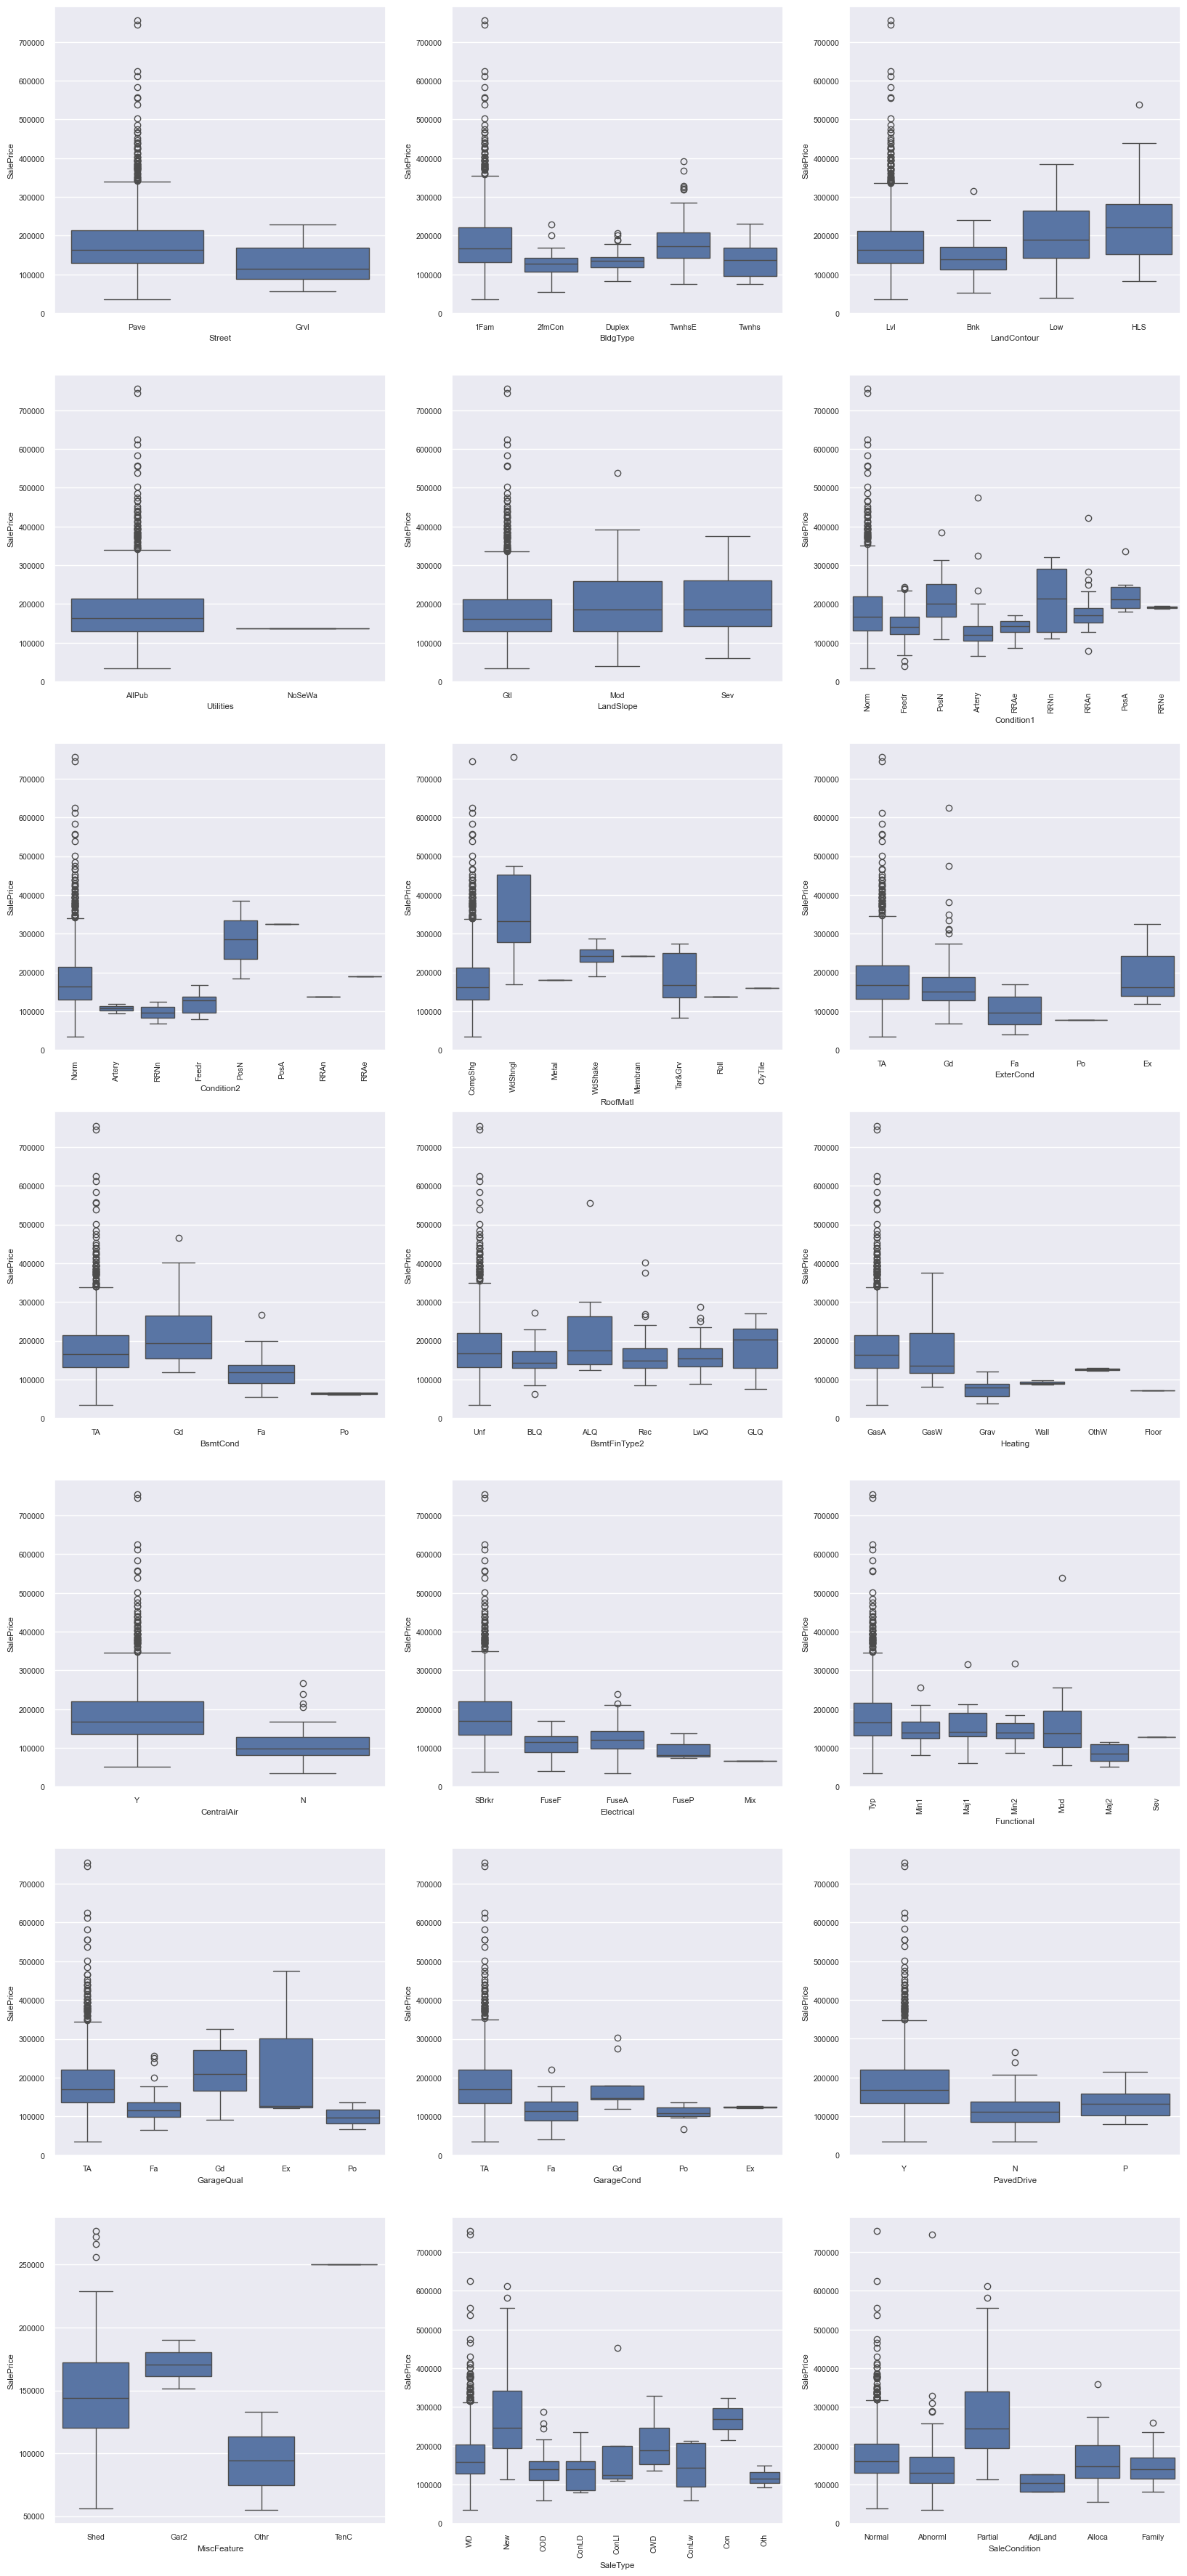

In [549]:
sus_features = ["Street", "BldgType",
                "LandContour", "Utilities", "LandSlope",
                "Condition1", "Condition2", "RoofMatl",
                "ExterCond", "BsmtCond", "BsmtFinType2",
                "Heating", "CentralAir", "Electrical", "Functional",
                "GarageQual", "GarageCond", "PavedDrive", "MiscFeature",
                "SaleType", "SaleCondition"]

plt.figure(figsize=(20, 45))
for i, feature in enumerate(sus_features):
    plt.subplot(7, 3, i+1)
    plot_cat_dependency(feature)

In [550]:
for featur in sus_features:
    print(train_df[featur].value_counts())
    print("="*50)

Street
Pave    1454
Grvl       6
Name: count, dtype: int64
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64
BsmtCond
TA    1311
Gd  

In [551]:
train_df["Heating"].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

Okay... Final decision to drop:<br>
- Street (1454/6 - obviously)
- Utilities (1459/1 - obviously)
- LandSlope (a lot of outliers + still poor feature ratio + no big diff on boxplot)
- Heating (poor feature ratio)
- Condition2
- RoofMatl
- MiscFeature (it's just because of nans)

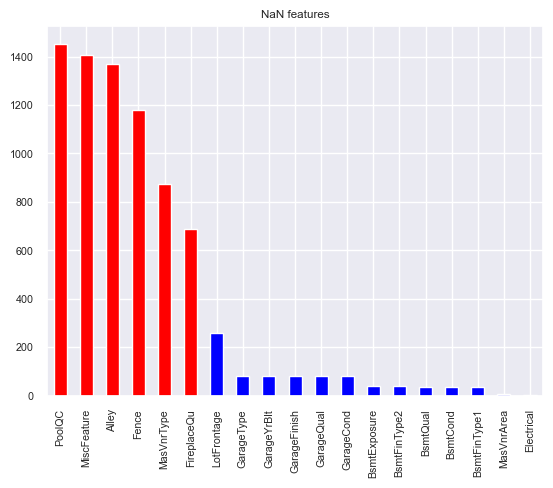

In [552]:
nans = train_df.isna().sum()
nans = nans[nans > 0].sort_values(ascending=False)
plt.title("NaN features")

colors = ["red" if val > 500 else "blue" for val in nans]
nans.plot.bar(color=colors);

**EDA showed:**
1) We can achieve good results, because there's a sweet dependency in data
2) We drop: PoolQC, MiscFeature, Alley, Fence, MasVnrType, Street, Utilities, LandSlope, Heating, Condition2, RoofMatl, FireplaceQu

**Data Preprocessing**
- Drop Shitty features
- Handle missing data
- Numerical part of the pipeline
- Categorical part of the pipeline
- Combine

In [553]:
exp_df = train_df.copy()
X_train = exp_df.drop("SalePrice", axis=1)
y_train = exp_df["SalePrice"]

In [554]:
drop_feats = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType",
              "Street", "LandSlope", "Heating", "Condition2", "RoofMatl",
              "FireplaceQu", "Id"]

X_train.drop(columns=drop_feats, inplace=True)

print(X_train.shape)
X_train.head()

(1460, 68)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [555]:
print(X_train.isna().sum().sum())  # still have some work to do

860


In [556]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [557]:
num_features = list(X_train.select_dtypes("number"))
cat_features = list(X_train.select_dtypes("object"))

In [558]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="unk")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [559]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

X_train_prepared = full_pipeline.fit_transform(X_train)

In [560]:
X_train_prepared.shape

(1460, 249)

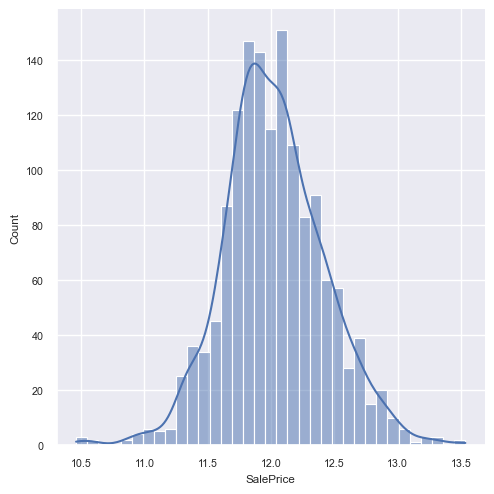

In [561]:
y_train_prepared = np.log(y_train)
sns.displot(y_train_prepared, kde=True);

In [562]:
from sklearn.model_selection import train_test_split

In [563]:
X_train, X_val, y_train, y_val = train_test_split(X_train_prepared, y_train_prepared, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1168, 249) (1168,)
(292, 249) (292,)


**Model Building**

In [564]:
from sklearn.linear_model import LinearRegression

In [565]:
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [566]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [567]:
preds = simple_linear_model.predict(X_val)
exp_y_val = np.exp(y_val)
exp_preds = np.exp(preds)
print(f"Simple Linear Regression error: {np.sqrt(mean_squared_error(exp_y_val, exp_preds))}")

Simple Linear Regression error: 35681.56576195491


Not bad for a dead simple linear regression. It's a good sign that we prepared data well!

In [568]:
from sklearn.metrics import make_scorer

In [569]:
def rmse_exp(y_true, y_pred):
    y_true_exp = np.exp(y_true)
    y_pred_exp = np.exp(y_pred)
    return np.sqrt(mean_squared_error(y_true_exp, y_pred_exp))

rmse_exp_scorer = make_scorer(rmse_exp, greater_is_better=False)

lin_reg_scores = cross_val_score(simple_linear_model, X_train_prepared, y_train_prepared,
                                 scoring=rmse_exp_scorer, cv=10)

In [570]:
print(-lin_reg_scores.mean())  # Not bad, not good either
# 36k is ~ 1/5 the price of an average house. Not cool to make such a mistake

36894.93172265502


In [571]:
models_perf = {}
models_perf["Linear Regression"] = -lin_reg_scores.mean()

Let's try regularized regression

In [572]:
from sklearn.linear_model import Ridge

In [573]:
ridge_linear_model = Ridge(alpha=0.5)
ridge_linear_model.fit(X_train, y_train)

,alpha,0.5
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [574]:
preds = ridge_linear_model.predict(X_val)
exp_y_val = np.exp(y_val)
exp_preds = np.exp(preds)
print(f"Ridge Linear Regression error: {np.sqrt(mean_squared_error(exp_y_val, exp_preds))}")

Ridge Linear Regression error: 35508.14223879969


In [575]:
ridge_reg_scores = cross_val_score(ridge_linear_model, X_train_prepared, y_train_prepared,
                                 scoring=rmse_exp_scorer, cv=10)

In [576]:
print(-ridge_reg_scores.mean())

36532.5708655868


In [577]:
# I mean, it's alright like...
models_perf["Ridge Regression"] = -ridge_reg_scores.mean()

In [578]:
from sklearn.svm import SVR

In [579]:
svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [580]:
preds = svr.predict(X_val)
exp_y_val = np.exp(y_val)
exp_preds = np.exp(preds)
print(f"SVR error: {np.sqrt(mean_squared_error(exp_y_val, exp_preds))}")

SVR error: 33585.58874893619


In [581]:
svr_scores = cross_val_score(svr, X_train_prepared, y_train_prepared,
                                 scoring=rmse_exp_scorer, cv=10)
print(-svr_scores.mean())

31028.28403158317


In [582]:
# Can you feel it? We're cookin "goodniceverynice inc." type shi!
models_perf["SVR(rbf kernel)"] = -svr_scores.mean()

In [583]:
from sklearn.ensemble import RandomForestRegressor

In [584]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [585]:
preds = rf.predict(X_val)
exp_y_val = np.exp(y_val)
exp_preds = np.exp(preds)
print(f"Random Forest error: {np.sqrt(mean_squared_error(exp_y_val, exp_preds))}")

Random Forest error: 35839.6302471971


In [586]:
rf_scores = cross_val_score(rf, X_train_prepared, y_train_prepared,
                                 scoring=rmse_exp_scorer, cv=5)
# Again! Slightly better!
print(-rf_scores.mean())

30283.219020602723


In [587]:
models_perf["Random Forest"] = -rf_scores.mean()

In [588]:
from xgboost import XGBRegressor

In [589]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [590]:
preds = xgb_regressor.predict(X_val)
exp_y_val = np.exp(y_val)
exp_preds = np.exp(preds)
print(f"XGB error: {np.sqrt(mean_squared_error(exp_y_val, exp_preds))}")

XGB error: 36428.67978968433


In [591]:
xgb_scores = cross_val_score(xgb_regressor, X_train_prepared, y_train_prepared,
                                 scoring=rmse_exp_scorer, cv=5)

In [592]:
# Okay... Still promising, because there's the next stage!
print(-xgb_scores.mean())

31631.572881127864


In [593]:
models_perf["XGBregressor"] = -rf_scores.mean()

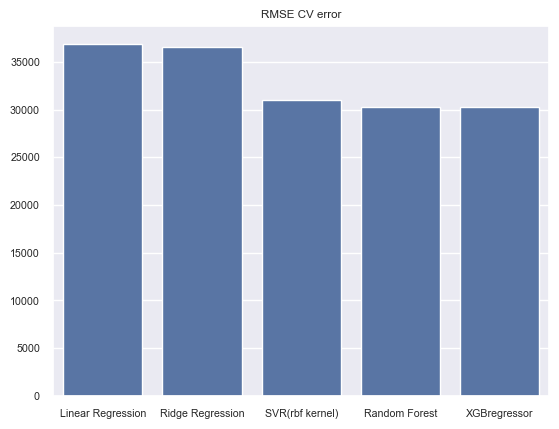

In [594]:
plt.title("RMSE CV error")
sns.barplot(x=models_perf.keys(), y=models_perf.values());

Among these models, the best performing are ensemble methods and SVR.
However, Ensembles are more perspective (and they're interpretable).
Plus, there's a beast XGBregressor.<br>
Let's focus on taking all we can from it.<br>
But before adjusting these models I should recap how they work.

In [595]:
from sklearn.model_selection import GridSearchCV

In [596]:
# Searching for the best Random Forest

param_grid = {"n_estimators": [30, 90, 270],
              "max_features": [32, 64, 128],
              "max_depth": [4, 6, 8]}

grid_search = GridSearchCV(rf, param_grid, scoring=rmse_exp_scorer, return_train_score=True, cv=5)
grid_search.fit(X_train_prepared, y_train_prepared)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [4, 6, ...], 'max_features': [32, 64, ...], 'n_estimators': [30, 90, ...]}"
,scoring,make_scorer(r...hod='predict')
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,270


In [597]:
-grid_search.best_score_  # LEEET'S GO!!! OUT OF 30K!

np.float64(29477.3283881212)

In [598]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 128, 'n_estimators': 270}

In [599]:
best_random_forest = grid_search.best_estimator_

In [600]:
best_rf_scores = cross_val_score(best_random_forest, X_train_prepared, y_train_prepared,
                                 scoring=rmse_exp_scorer, cv=5)

print(-best_rf_scores.mean())

29687.74166469808


In [601]:
from sklearn.model_selection import RandomizedSearchCV

In [602]:
# Searching for the best XGBoost regressor

param_grid = {
    'n_estimators': [100, 300, 500],          # number of trees, 300 is usually a solid start
    'max_depth': [3, 5, 7],                   # deeper trees can overfit, shallow (3-5) usually better for sparse OHE
    'learning_rate': [0.01, 0.05, 0.1],      # smaller learning rate → more trees needed, but more stable
    'subsample': [0.6, 0.8, 1.0],             # fraction of samples per tree (prevents overfitting)
    'colsample_bytree': [0.4, 0.6, 0.8],     # fraction of features per tree (important with many sparse features)
    'reg_alpha': [0, 0.1, 1],                 # L1 regularization (helps sparsity)
    'reg_lambda': [1, 5, 10],                 # L2 regularization (helps reduce overfitting)
    'min_child_weight': [1, 5, 10],           # controls minimum sum of instance weight in leaf, prevents overfitting
}



xgb_regressor = XGBRegressor(device="cuda")
rand_search = RandomizedSearchCV(xgb_regressor, param_grid, scoring=rmse_exp_scorer, return_train_score=True, cv=3)
rand_search.fit(X_train_prepared, y_train_prepared)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.4, 0.6, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'min_child_weight': [1, 5, ...], ...}"
,n_iter,10
,scoring,make_scorer(r...hod='predict')
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [603]:
-rand_search.best_score_

np.float64(26403.397913578985)

**WOOOOOOW!**

In [604]:
rand_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 500,
 'min_child_weight': 10,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 0.4}

In [605]:
best_xgboost = rand_search.best_estimator_

In [606]:
best_xgb_scores = cross_val_score(best_xgboost, X_train_prepared, y_train_prepared,
                                 scoring=rmse_exp_scorer, cv=5)

print(-best_xgb_scores.mean())

26826.592488134647


In [607]:
y_pred = best_xgboost.predict(X_train)
y_pred_exp = np.exp(y_pred)
y_train_exp = np.exp(y_train)
print(np.sqrt(mean_squared_error(y_train_exp, y_pred_exp)))

1415.8609635525643


Ah... Well... It's a bit overfitted...<br>
Let's try adding more modification

In [608]:
rand_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 500,
 'min_child_weight': 10,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 0.4}

In [609]:
xgb_reg = XGBRegressor(subsample=0.6, reg_lambda=5, reg_alpha=0.4,
                       n_estimators=128, min_child_weight=10, max_depth=5,
                       learning_rate=0.05, colsample_bytree=0.8)

In [610]:
xgb_reg.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [611]:
y_pred = xgb_reg.predict(X_train)
y_pred_exp = np.exp(y_pred)
y_train_exp = np.exp(y_train)
print(np.sqrt(mean_squared_error(y_train_exp, y_pred_exp)))

19998.60798843844


In [612]:
reg_xgb_scores = cross_val_score(xgb_reg, X_train_prepared, y_train_prepared,
                                 scoring=rmse_exp_scorer, cv=5)

print(-reg_xgb_scores.mean())

28419.71805186004


Performance is slightly worse, but the results are still good + train/val difference is smaller

In [613]:
models_perf["XGBregressor(best)"] = -best_xgb_scores.mean()
models_perf["Random Forest(best)"] = -best_rf_scores.mean()
models_perf["XGBregressor(balanced)"] = -reg_xgb_scores.mean()

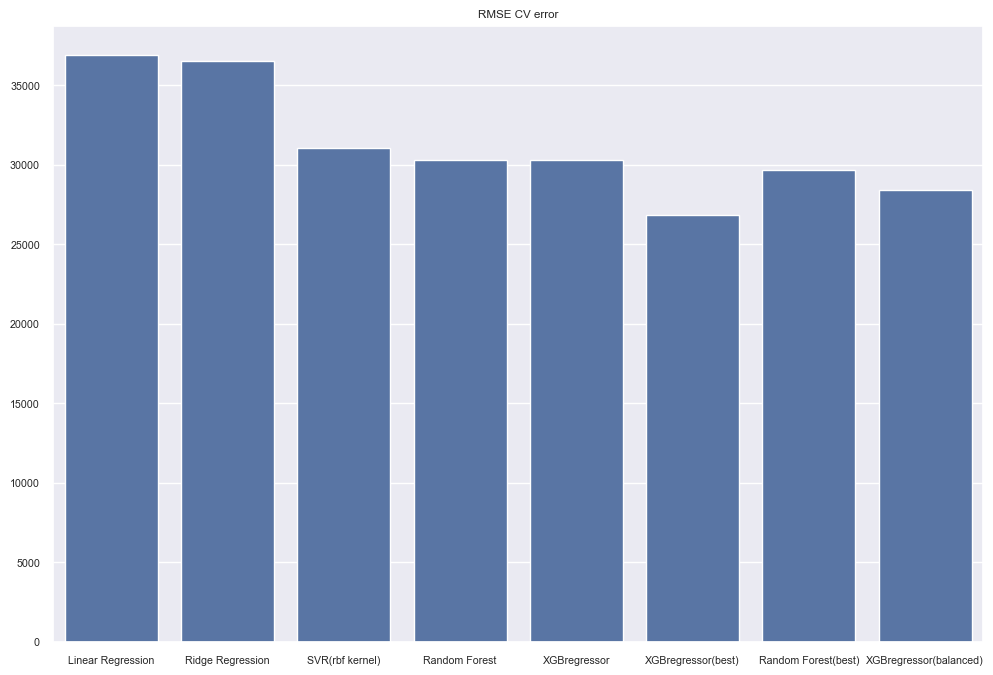

In [614]:
plt.figure(figsize=(12, 8))
plt.title("RMSE CV error")
sns.barplot(x=models_perf.keys(), y=models_perf.values());

In [615]:
X_test = pd.read_csv("data/test.csv")
X_test.drop(columns=drop_feats, inplace=True)

In [616]:
X_test_prepared = full_pipeline.transform(X_test)

# **🍾That's it!🥳**
We did it!<br>
It's my first (such comprehensive) miniproject.<br>
Wild stuff!